In [ ]:
#Import almost all libraries

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To supress the warning messages generated
import warnings

In [ ]:
spends=pd.read_csv('fact_spends.csv')

In [ ]:
spends.shape

(864000, 5)

In [ ]:
customers=pd.read_csv('dim_customers.csv')

In [ ]:
customers.shape

(4000, 7)

In [ ]:
#Concate the two sheet on single column
df = pd.merge(spends, customers, on='customer_id')

In [ ]:
# Assuming 'df' is your cleaned DataFrame
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df.shape

(864000, 11)

In [ ]:
len(df['customer_id'].unique())

4000

There are 4000 unique customers in the given data set

In [ ]:
df.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696


In [ ]:
df1=df[['customer_id','gender']]

In [ ]:
df1.to_csv('gender.csv',index=False)

In [ ]:
df.describe()

,spend,avg_income
count,864000.000000,864000.000000
mean,614.464994,51657.032250
std,661.571676,14688.312762
min,6.000000,24816.000000
25%,191.000000,38701.000000
50%,395.000000,50422.000000
75%,793.000000,64773.250000
max,10313.000000,86600.000000


In [ ]:
df.isnull().sum()

customer_id       0
month             0
category          0
payment_type      0
spend             0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

There is no any null value is there


In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864000 entries, 0 to 863999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customer_id     864000 non-null  object
 1   month           864000 non-null  object
 2   category        864000 non-null  object
 3   payment_type    864000 non-null  object
 4   spend           864000 non-null  int64 
 5   age_group       864000 non-null  object
 6   city            864000 non-null  object
 7   occupation      864000 non-null  object
 8   gender          864000 non-null  object
 9   marital status  864000 non-null  object
 10  avg_income      864000 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 79.1+ MB


If there is any duplicate row it will be removed

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame loaded with the dataset shown in the image.

# Grouping customers by demographic features
demographic_groups = df.groupby(['age_group', 'gender', 'occupation'])

# Calculating the number of customers and average spend for each group
customer_demographics = demographic_groups.agg(
    number_of_customers=pd.NamedAgg(column='customer_id', aggfunc='nunique'),
    average_spend=pd.NamedAgg(column='spend', aggfunc='mean')
).reset_index()

# Sorting the results for better readability
customer_demographics = customer_demographics.sort_values(by='average_spend', ascending=False)

# Displaying the insights
print(customer_demographics)


   age_group  gender                occupation  number_of_customers  \
28     35-45    Male     Salaried IT Employees                  239   
18     25-34    Male     Salaried IT Employees                  257   
23     35-45  Female     Salaried IT Employees                  181   
38       45+    Male     Salaried IT Employees                   84   
13     25-34  Female     Salaried IT Employees                  203   
25     35-45    Male           Business Owners                  123   
33       45+  Female     Salaried IT Employees                   64   
15     25-34    Male           Business Owners                  191   
8      21-24    Male     Salaried IT Employees                  141   
35       45+    Male           Business Owners                  115   
20     35-45  Female           Business Owners                   32   
3      21-24  Female     Salaried IT Employees                  125   
10     25-34  Female           Business Owners                   48   
29    

1) Age Group Insights:

The age group of 35-45, particularly males in IT occupations, has the highest average spend, suggesting that marketing efforts targeting this demographic could be quite effective.
Younger age groups (21-24) tend to spend less on average compared to the 25-34 and 35-45 age groups. This could be due to lower income levels at the start of their careers or different spending habits.

2)Gender Insights:

Across the board, males seem to spend more on average than females in the same occupation and age group. This could indicate that males in this customer set have more disposable income or different spending priorities.

3)Occupation Insights:

Salaried IT employees, regardless of age and gender, tend to be higher spenders. This suggests that products or services that appeal to tech employees could be particularly lucrative.
Business owners, particularly in the 35-45 age range, also show a high average spend, which might indicate that they have more disposable income or that they make more transactions related to their business.
Freelancers and government employees have a lower average spend, which might suggest either a more conservative spending habit or less disposable income.

2) Avg income utilisation %: Find the average income utilisation % of customers
(avg_spends/avg_income). This will be your key metric. The higher the average
income utilisation %, the more is their likelihood to use credit cards

In [ ]:
# First, calculate the total spend for each customer across all months
total_spend_per_customer = df.groupby('customer_id')['spend'].sum()

# Then, calculate the average monthly income for each customer

average_income_per_customer = df.groupby('customer_id')['avg_income'].mean()
income_per_customer_6_month=average_income_per_customer*6
# Now, calculate the average income utilization percentage for each customer
# This is their total spend across all months divided by their average monthly income
avg_income_utilization_per_customer = (total_spend_per_customer / (income_per_customer_6_month)) * 100

# Combine the series into a new DataFrame
customer_spend_ratio = pd.DataFrame({
    'total_spend': total_spend_per_customer,
    'average_monthly_income': average_income_per_customer,
    'income_per_customer_6_month':income_per_customer_6_month,
    'avg_income_utilization_pct': avg_income_utilization_per_customer

}).reset_index()

customer_spend_ratio.sort_values(by='avg_income_utilization_pct',ascending=False).reset_index()


,index,customer_id,total_spend,average_monthly_income,income_per_customer_6_month,avg_income_utilization_pct
0,911,ATQCUS0912,295379,63625.0,381750.0,77.374984
1,942,ATQCUS0943,300422,65630.0,393780.0,76.291838
2,162,ATQCUS0163,267974,58558.0,351348.0,76.270251
3,917,ATQCUS0918,315201,68895.0,413370.0,76.251542
4,165,ATQCUS0166,266182,58736.0,352416.0,75.530623
...,...,...,...,...,...,...
3995,3113,ATQCUS3114,60513,61997.0,371982.0,16.267723
3996,3109,ATQCUS3110,72631,76796.0,460776.0,15.762757
3997,2065,ATQCUS2066,36410,39072.0,234432.0,15.531156
3998,2066,ATQCUS2067,35265,38867.0,233202.0,15.122083


In [ ]:
df.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696


In [ ]:
df=pd.merge(df,customer_spend_ratio,on='customer_id')

In [ ]:
df=df.drop(['avg_income','total_spend','average_monthly_income','income_per_customer_6_month'],axis=1)

In [ ]:
data=df.groupby(['city'])['avg_income_utilization_pct'].mean().reset_index(name='Percentage').sort_values(by='Percentage',ascending=False)


<Axes: xlabel='city', ylabel='Percentage'>

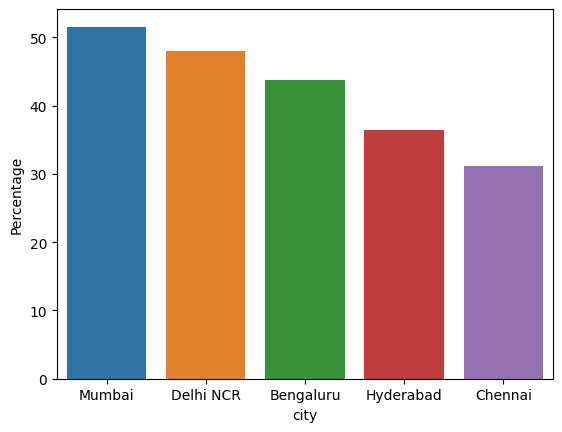

In [ ]:
sns.barplot(x='city',y='Percentage',data=data)

From above we can see that Income percentage utilization ratio is higher in the mumbai city. So, we can target mumbai city customers as they are spending high so there is good chances that they use credit card

In [ ]:
df['category'].unique()

array(['Health & Wellness', 'Bills', 'Electronics', 'Travel', 'Others',
       'Groceries', 'Food', 'Entertainment', 'Apparel'], dtype=object)

In [ ]:
df.groupby(['city','category'])['spend'].sum()

city       category         
Bengaluru  Apparel               6221182
           Bills                19985915
           Electronics          14877951
           Entertainment         7707647
           Food                  8257123
           Groceries            16410593
           Health & Wellness    12254203
           Others                2989072
           Travel               11314343
Chennai    Apparel               4689870
           Bills                16315156
           Electronics          12064058
           Entertainment         5666508
           Food                  6411034
           Groceries            13286540
           Health & Wellness     9987577
           Others                2406739
           Travel                9044027
Delhi NCR  Apparel               7053860
           Bills                22167023
           Electronics          16663133
           Entertainment         8405111
           Food                  9162619
           Groceries        

In [ ]:
# Group by 'city' and 'category' and sum the 'spend'
spend_by_city_category = df.groupby(['city', 'category'])['spend'].sum().reset_index()

# Calculate the total spend per city
total_spend_per_city = df.groupby('city')['spend'].sum().reset_index()

# Merge the total spend back into the spend by category DataFrame
spend_by_city_category = spend_by_city_category.merge(total_spend_per_city, on='city', suffixes=('', '_total'))

# Calculate the percentage of spend for each category within each city
spend_by_city_category['spend_pct'] = (spend_by_city_category['spend'] / spend_by_city_category['spend_total']) * 100

# Now you can drop the 'spend_total' column if it's no longer needed
spend_by_city_category = spend_by_city_category.drop(columns='spend_total')


# Sort the resulting DataFrame by 'city' and 'spend_pct' in descending order to get the highest percentages at the top
spend_by_city_category_sorted = spend_by_city_category.sort_values(by=['city', 'spend_pct'], ascending=[True, False])

# This sorted DataFrame will now have each city with categories sorted by the percentage of spend in descending order
spend_by_city_category_sorted





,city,category,spend,spend_pct
1,Bengaluru,Bills,19985915,19.982312
5,Bengaluru,Groceries,16410593,16.407635
2,Bengaluru,Electronics,14877951,14.875269
6,Bengaluru,Health & Wellness,12254203,12.251994
8,Bengaluru,Travel,11314343,11.312304
4,Bengaluru,Food,8257123,8.255635
3,Bengaluru,Entertainment,7707647,7.706258
0,Bengaluru,Apparel,6221182,6.220061
7,Bengaluru,Others,2989072,2.988533
10,Chennai,Bills,16315156,20.426753


In [ ]:
# Group by 'city' and 'payment_type' and sum the 'spend'
spend_by_city_payment = df.groupby(['city', 'payment_type'])['spend'].sum().reset_index()

# Calculate the total spend per city
total_spend_per_city = df.groupby('city')['spend'].sum().reset_index()

# Merge the total spend back into the spend by payment type DataFrame
spend_by_city_payment = spend_by_city_payment.merge(total_spend_per_city, on='city', suffixes=('', '_total'))

# Calculate the percentage of spend for each payment type within each city
spend_by_city_payment['spend_pct'] = (spend_by_city_payment['spend'] / spend_by_city_payment['spend_total']) * 100

# Sort the resulting DataFrame by 'city' and 'spend_pct' in descending order
spend_by_city_payment_sorted = spend_by_city_payment.sort_values(by=['city', 'spend_pct'], ascending=[True, False])

# Now you have a sorted DataFrame with each city, payment type, and the percentage of spend
spend_by_city_payment_sorted


,city,payment_type,spend,spend_total,spend_pct
0,Bengaluru,Credit Card,40211465,100018029,40.204217
3,Bengaluru,UPI,26531509,100018029,26.526726
1,Bengaluru,Debit Card,22598048,100018029,22.593975
2,Bengaluru,Net Banking,10677007,100018029,10.675082
4,Chennai,Credit Card,33128287,79871509,41.476976
7,Chennai,UPI,20911503,79871509,26.181430
5,Chennai,Debit Card,18000894,79871509,22.537316
6,Chennai,Net Banking,7830825,79871509,9.804278
8,Delhi NCR,Credit Card,45846278,111449559,41.136348
11,Delhi NCR,UPI,29479740,111449559,26.451195


In [ ]:
# Import necessary library
import pandas as pd

# Assuming df is your DataFrame

# Aggregate spending by category
spending_by_category = df.groupby('category')['spend'].sum()

# Total spending by different demographics
spending_by_occupation = df.groupby('occupation')['spend'].sum()
spending_by_gender = df.groupby('gender')['spend'].sum()
spending_by_city = df.groupby('city')['spend'].sum()
spending_by_age_group = df.groupby('age_group')['spend'].sum()


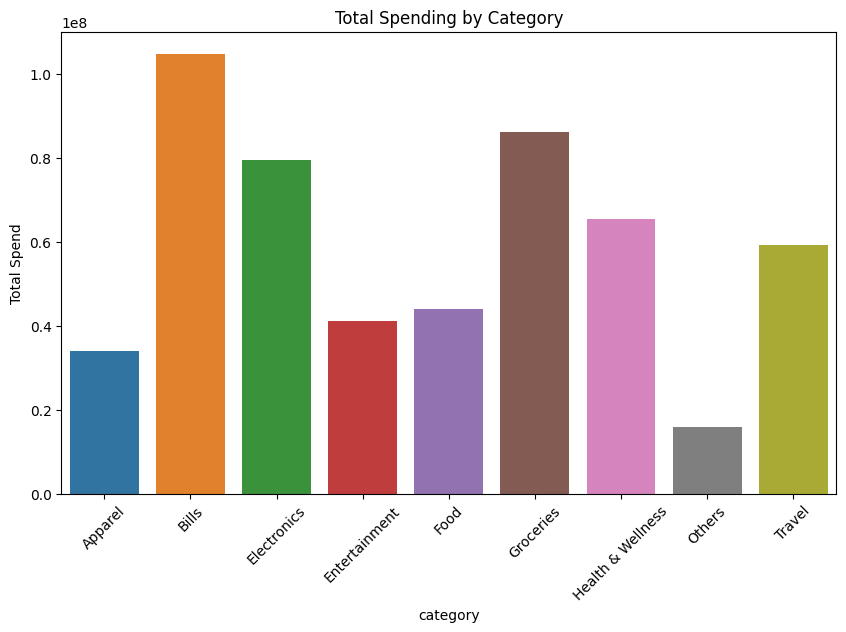

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For example, to plot spending by category
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_category.index, y=spending_by_category.values)
plt.xticks(rotation=45)
plt.title('Total Spending by Category')
plt.ylabel('Total Spend')
plt.show()


In [ ]:
# Example: Spending by category within each occupation
spending_by_occupation_category = df.groupby(['occupation', 'category'])['spend'].sum().reset_index()


In [ ]:
spending_by_occupation_category

,occupation,category,spend
0,Business Owners,Apparel,4535186
1,Business Owners,Bills,18890434
2,Business Owners,Electronics,13666284
3,Business Owners,Entertainment,6936727
4,Business Owners,Food,6895848
5,Business Owners,Groceries,15432082
6,Business Owners,Health & Wellness,9291275
7,Business Owners,Others,2546559
8,Business Owners,Travel,9810314
9,Freelancers,Apparel,4129048


In [ ]:
df['occupation'].unique()

array(['Salaried IT Employees', 'Salaried Other Employees',
       'Government Employees', 'Business Owners', 'Freelancers'],
      dtype=object)

In [ ]:
spend_by_occupation_category = df.groupby(['occupation', 'category'])['spend'].sum().reset_index().sort_values(by='spend',ascending=False)
spend_by_occupation_category

,occupation,category,spend
28,Salaried IT Employees,Bills,45874131
32,Salaried IT Employees,Groceries,37944382
29,Salaried IT Employees,Electronics,35662201
33,Salaried IT Employees,Health & Wellness,32270966
35,Salaried IT Employees,Travel,27212716
31,Salaried IT Employees,Food,20848372
30,Salaried IT Employees,Entertainment,19063859
1,Business Owners,Bills,18890434
27,Salaried IT Employees,Apparel,17395479
37,Salaried Other Employees,Bills,17141830


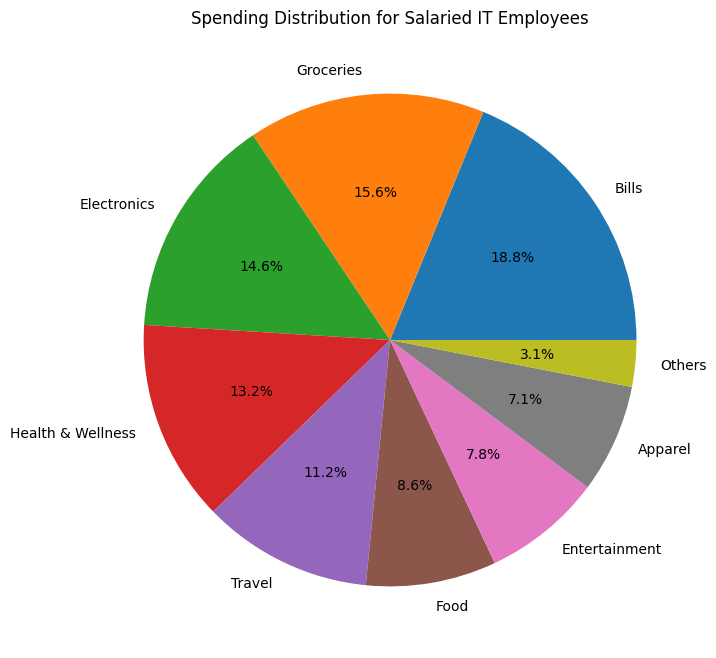

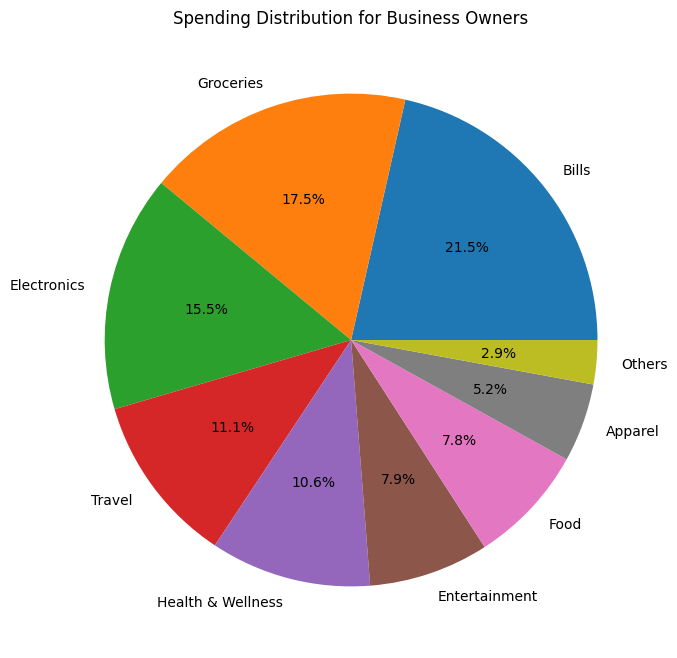

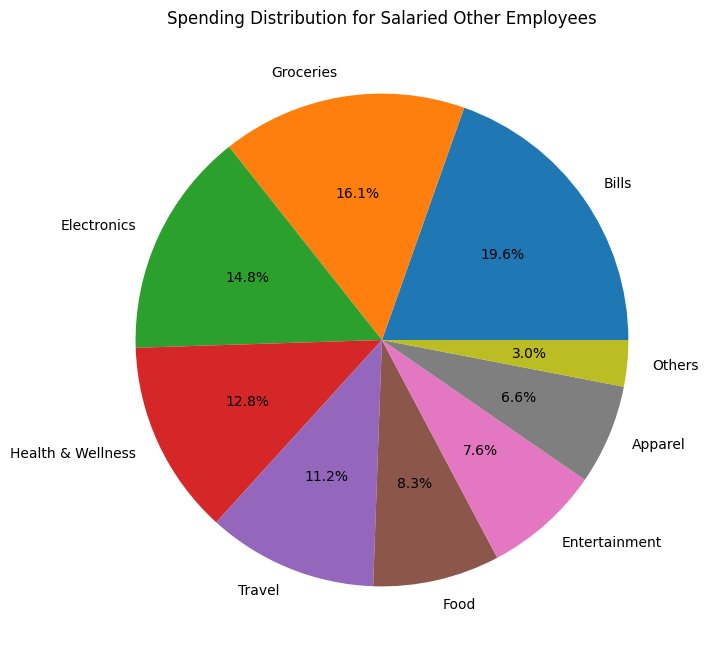

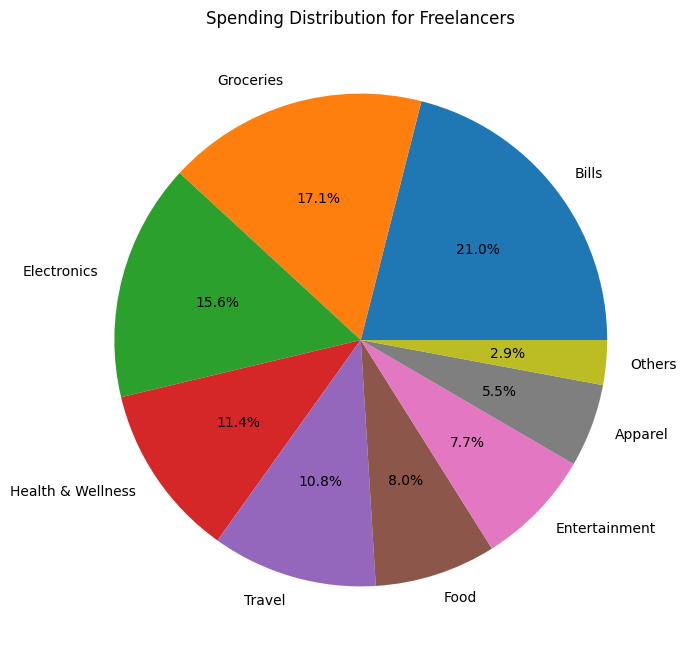

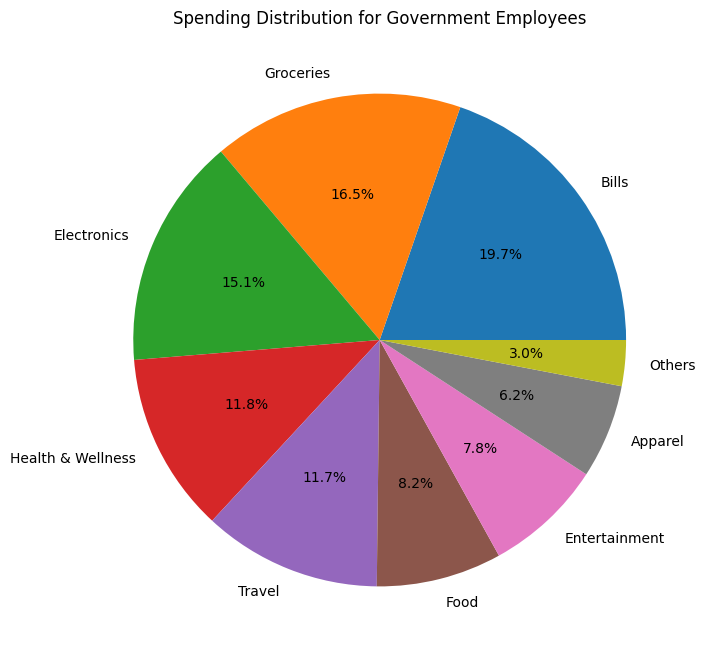

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_occupation_category is already defined as per your provided code

# Get unique occupations
occupations = spend_by_occupation_category['occupation'].unique()

# Plot a pie chart for each occupation
for occupation in occupations:
    # Filter the data for the current occupation
    data = spend_by_occupation_category[spend_by_occupation_category['occupation'] == occupation]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for {occupation}')
    plt.show()


From above graph we can see that in every occupation three most spend factors are


1.   Bills
2.   Groceries
3.   Electronics



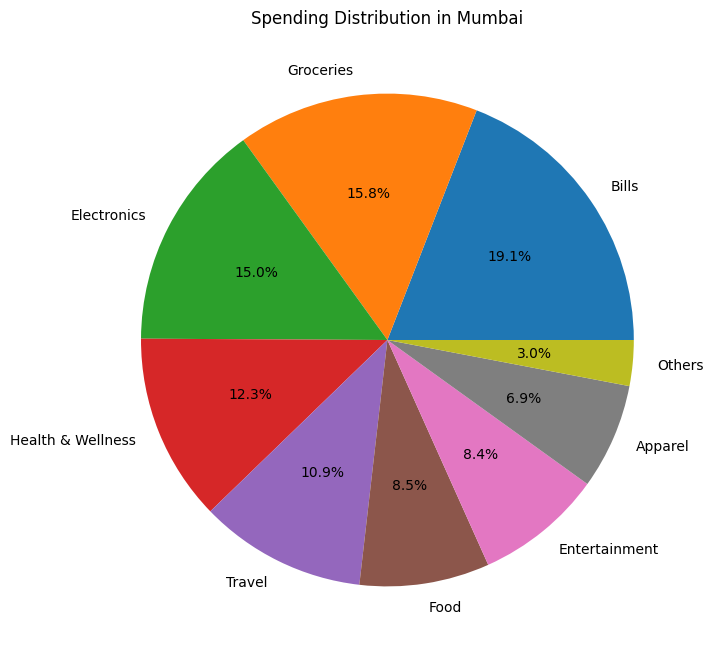

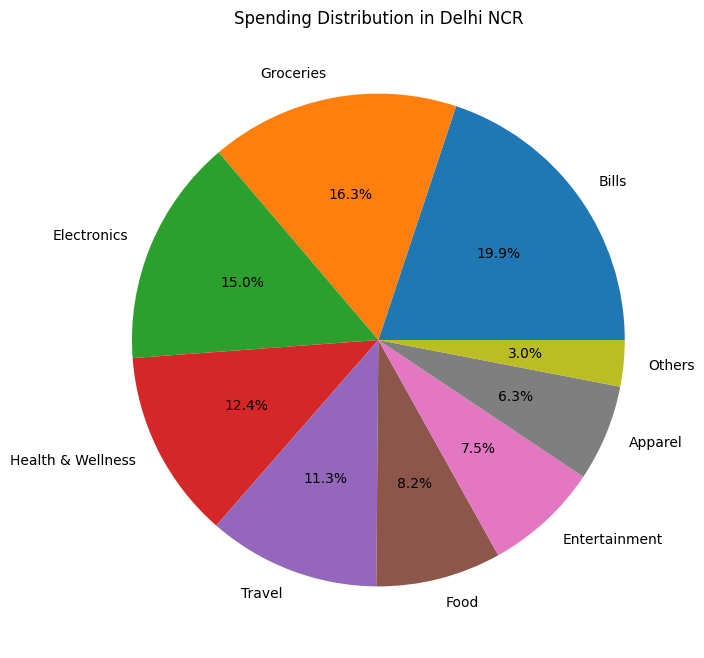

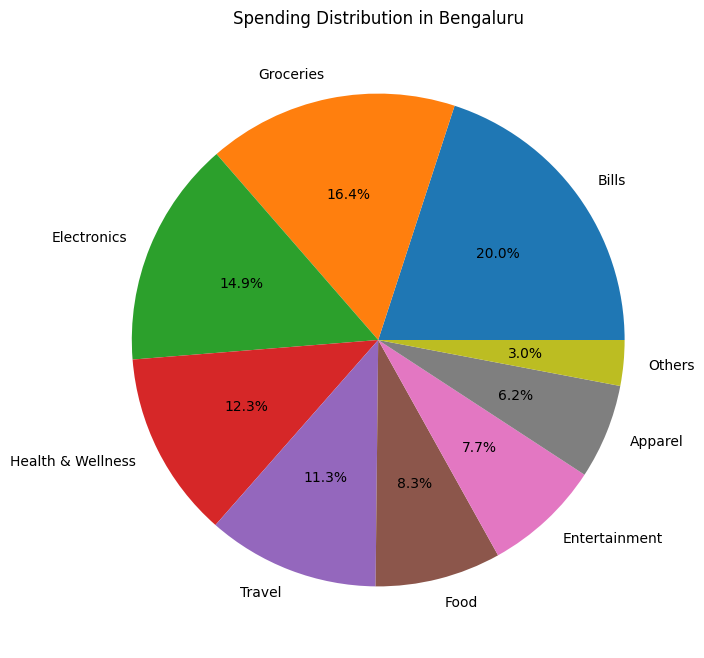

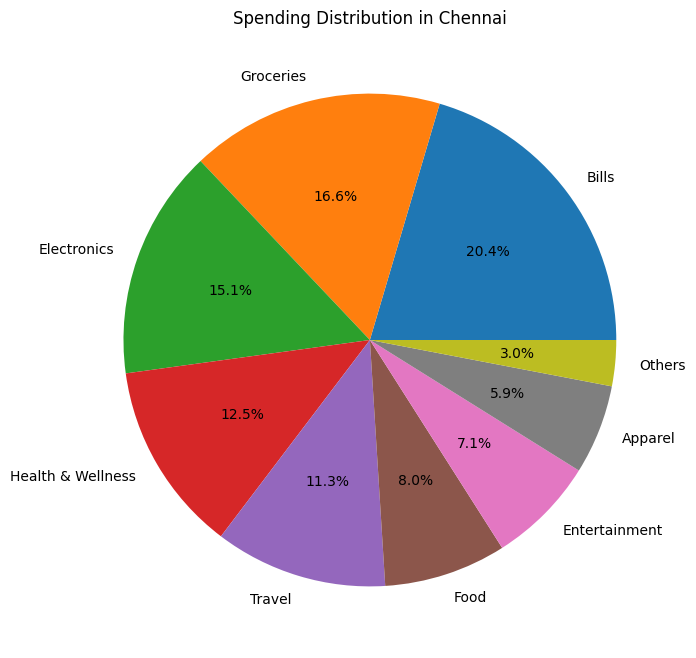

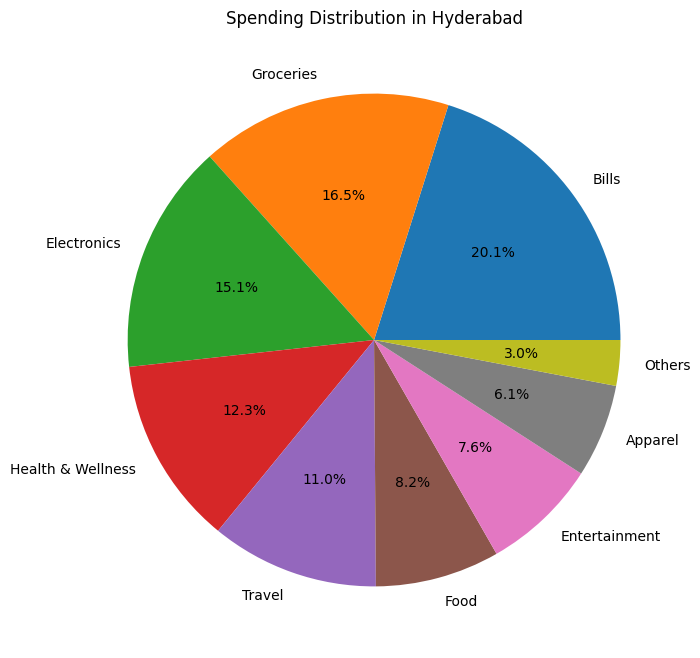

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_city_category is already defined similar to your previous code, but grouped by city and category
# Example: spend_by_city_category = df.groupby(['city', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)
# Assuming 'df' is your original DataFrame with 'city', 'category', and 'spend' columns
spend_by_city_category = df.groupby(['city', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique cities
cities = spend_by_city_category['city'].unique()

# Plot a pie chart for each city
for city in cities:
    # Filter the data for the current city
    data = spend_by_city_category[spend_by_city_category['city'] == city]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution in {city}')
    plt.show()


From above chart we can conclude that three categories in which money spent is almost same for each city

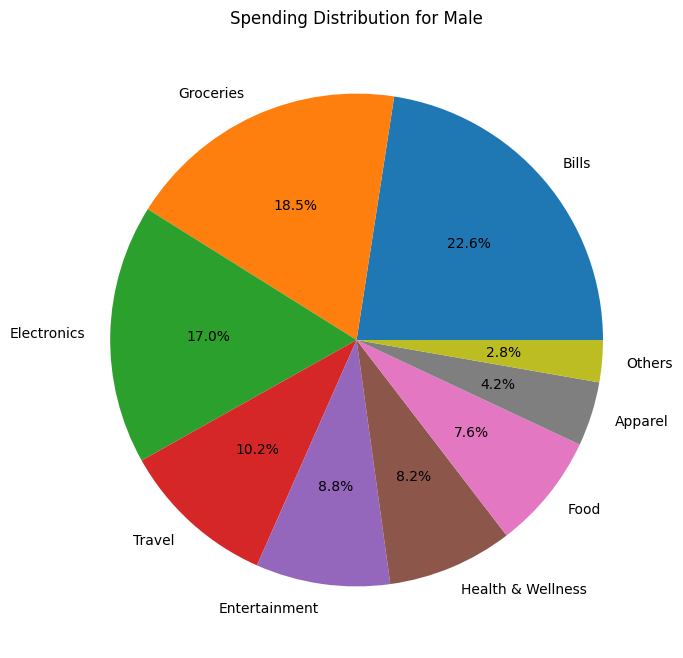

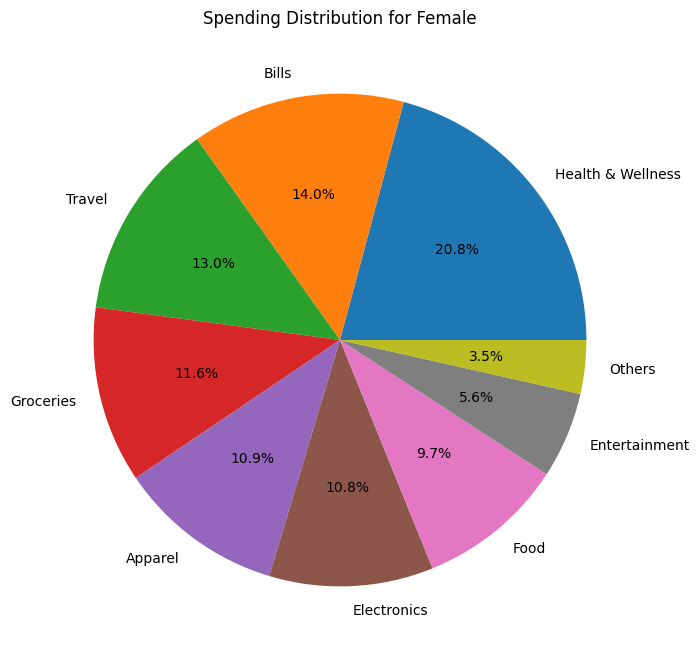

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_gender_category is already defined similar to your previous code, but grouped by gender and category
spend_by_gender_category = df.groupby(['gender', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique genders
genders = spend_by_gender_category['gender'].unique()

# Plot a pie chart for each gender
for gender in genders:
    # Filter the data for the current gender
    data = spend_by_gender_category[spend_by_gender_category['gender'] == gender]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for {gender}')
    plt.show()


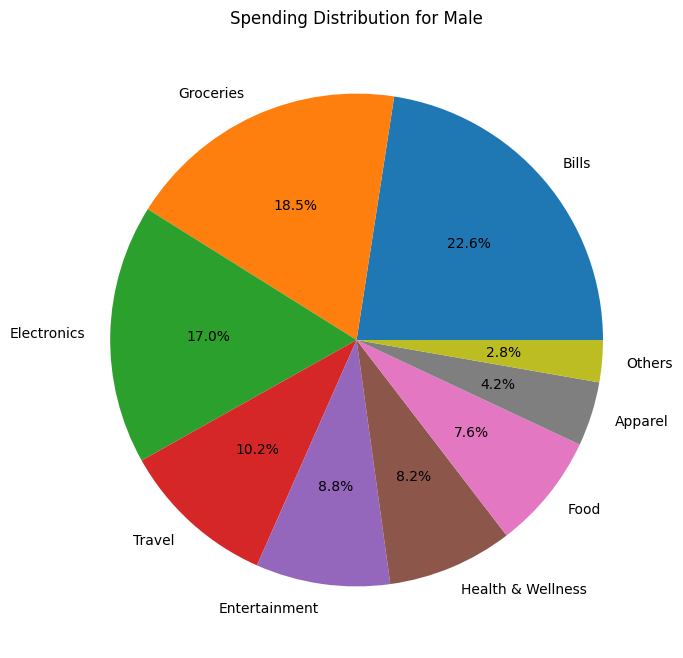

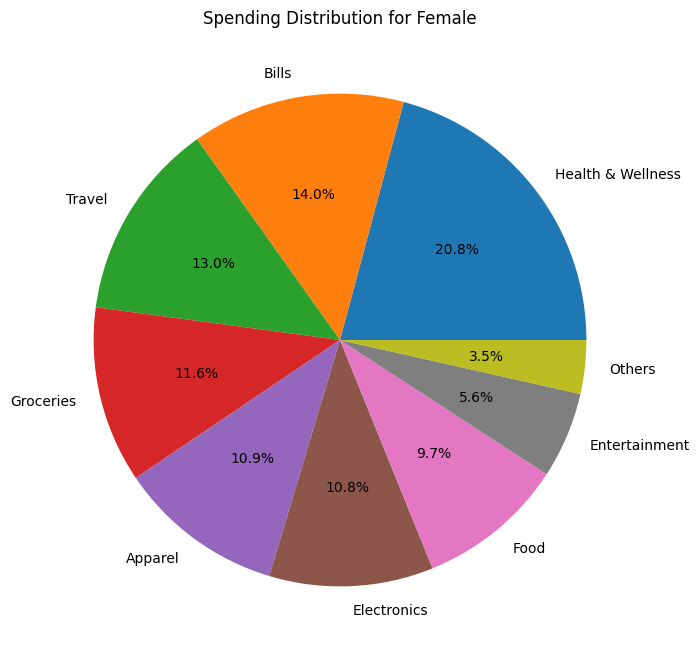

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_gender_category is already defined similar to your previous code, but grouped by gender and category
# Example: spend_by_gender_category = df.groupby(['gender', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique genders
genders = spend_by_gender_category['gender'].unique()

# Plot a pie chart for each gender
for gender in genders:
    # Filter the data for the current gender
    data = spend_by_gender_category[spend_by_gender_category['gender'] == gender]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for {gender}')
    plt.show()


From above chart we can see that Male first three priorities are


1.   Bills
2.   Groceries
3.   Electronics

Where as Girls:



1.   Health and Wellness
2.   Bills
3.   Travel





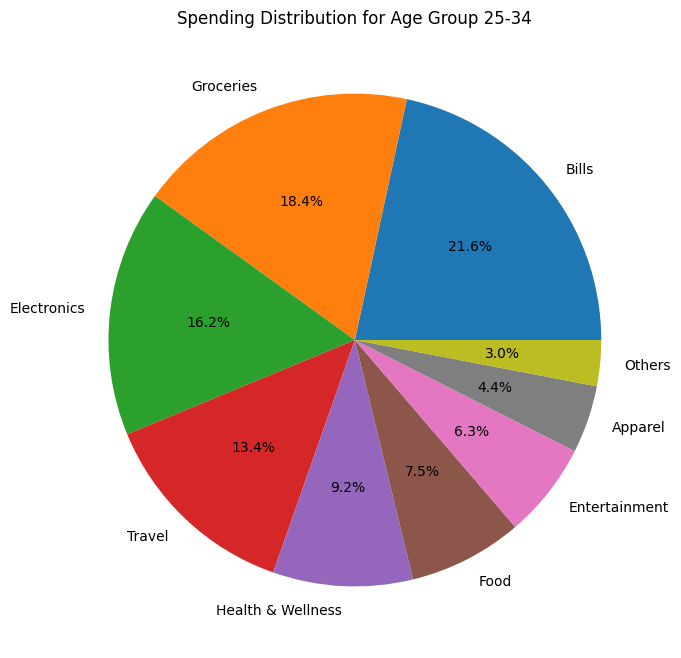

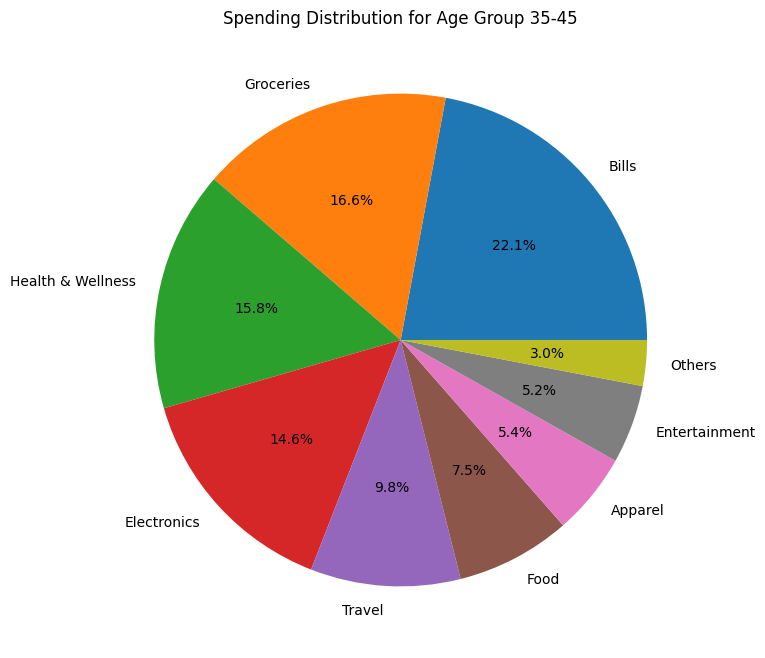

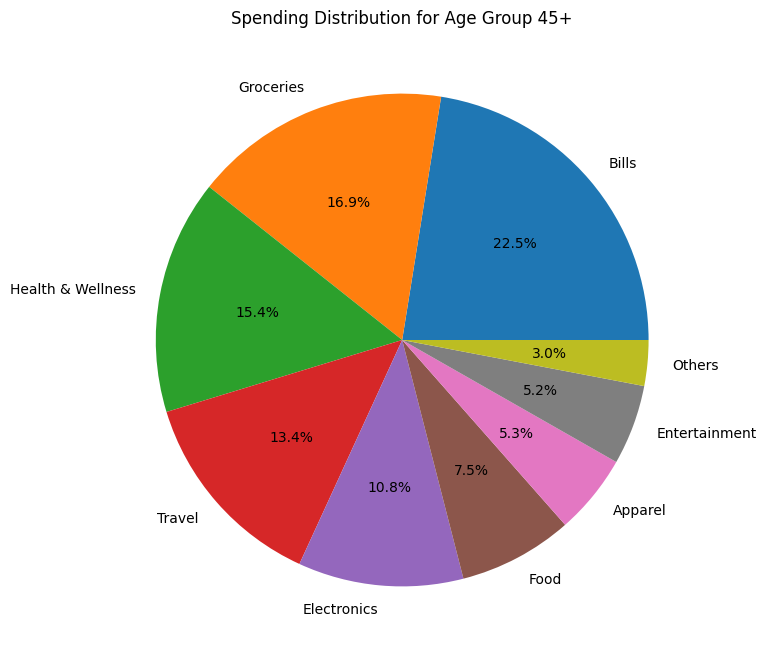

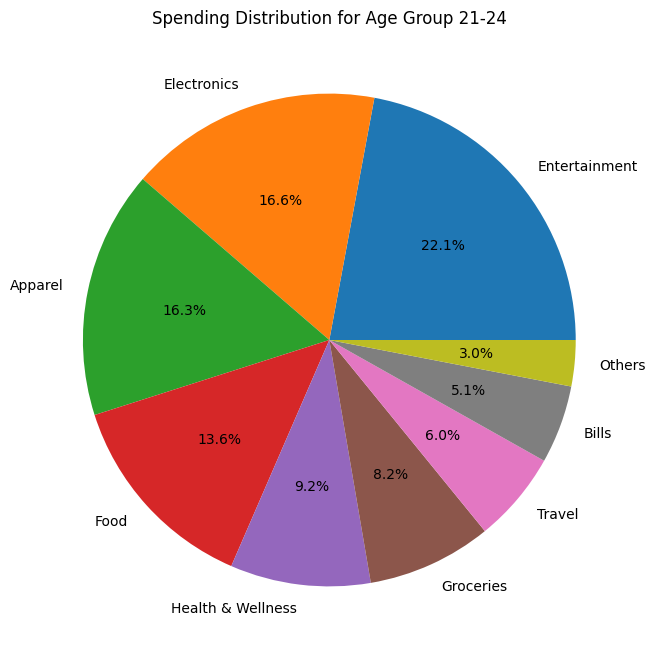

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_age_group_category is already defined similar to your previous code, but grouped by age_group and category
spend_by_age_group_category = df.groupby(['age_group', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique age groups
age_groups = spend_by_age_group_category['age_group'].unique()

# Plot a pie chart for each age group
for age_group in age_groups:
    # Filter the data for the current age group
    data = spend_by_age_group_category[spend_by_age_group_category['age_group'] == age_group]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for Age Group {age_group}')
    plt.show()


Different age group also have their different need:

Age group 21-24
1.   Entertainment
2.   Electronics
3.   Apparel

Age group 25-34
1. Bill
2. Groceries
3. Electronics

Age group 35-45
1. Bill
2. Groceries
3. Health and Wellness

Age group 45
1. Bill
2. Groceries
3. Health and Wellness



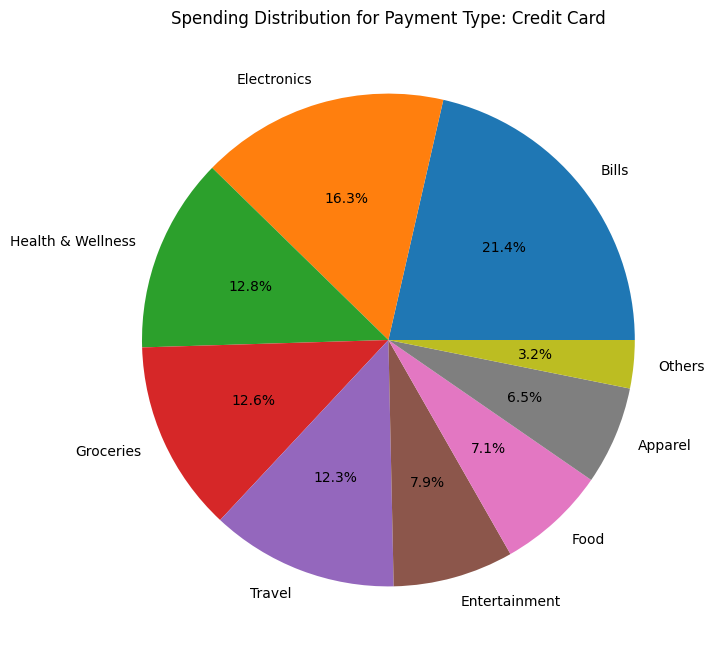

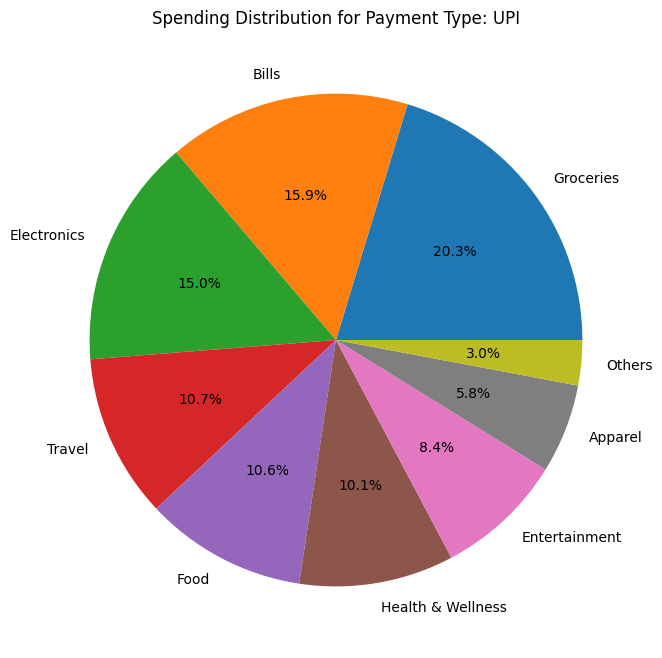

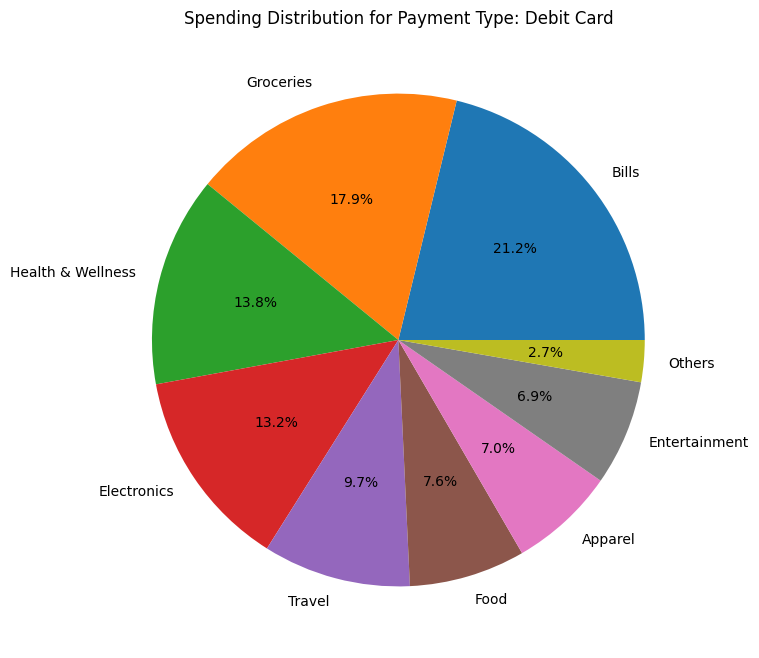

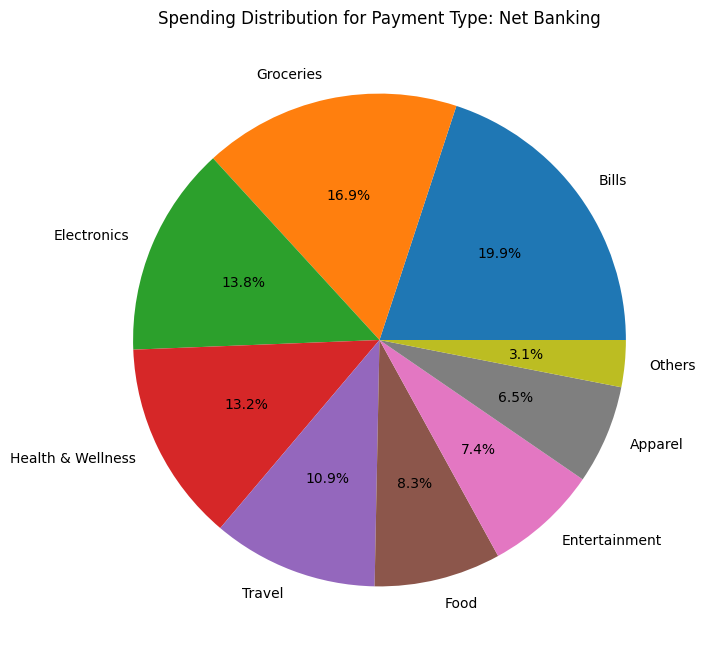

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_payment_type_category is already defined similar to your previous code, but grouped by payment_type and category
spend_by_payment_type_category = df.groupby(['payment_type', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique payment types
payment_types = spend_by_payment_type_category['payment_type'].unique()

# Plot a pie chart for each payment type
for payment_type in payment_types:
    # Filter the data for the current payment type
    data = spend_by_payment_type_category[spend_by_payment_type_category['payment_type'] == payment_type]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for Payment Type: {payment_type}')
    plt.show()


The people who are using the Credit card and if we want to attact them then we have to give them good cashback on bill payment because around 21 percentage of the people are using credit card to pay the bills



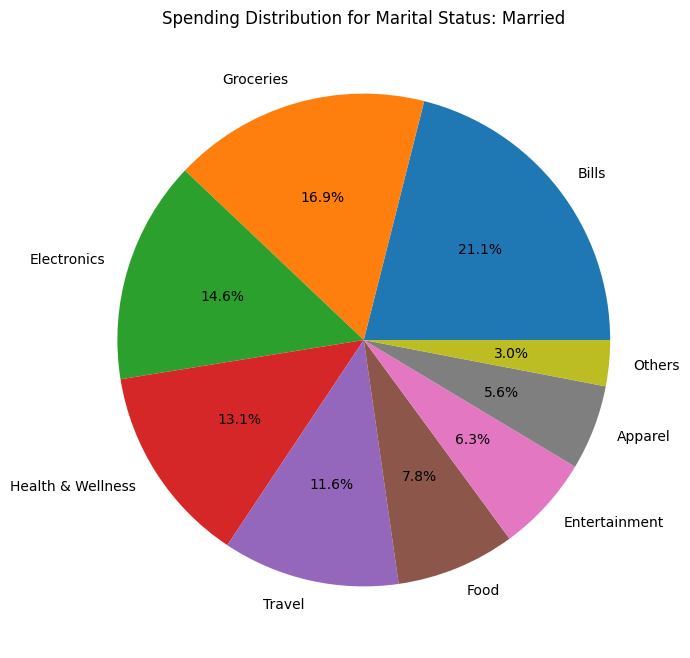

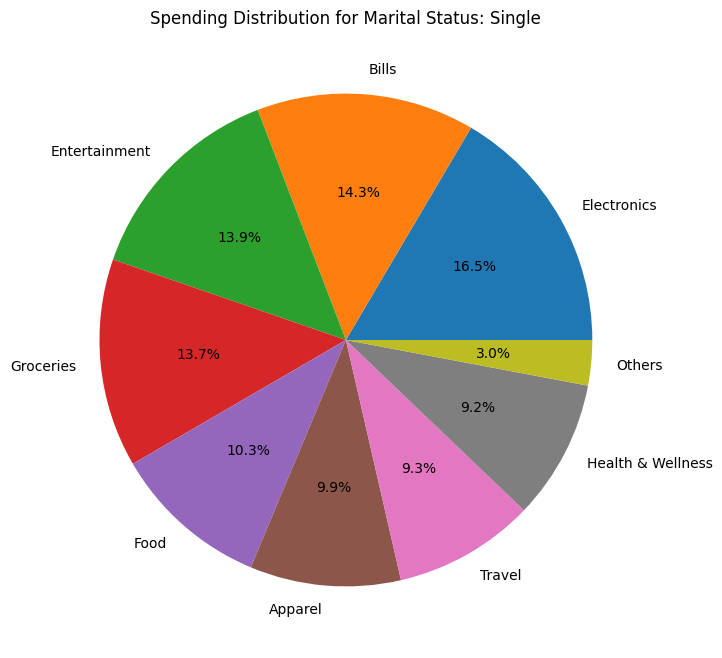

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has a column that needs to be renamed to 'marital_status'

# Rename the column
df.rename(columns={'MaritalStatus': 'marital status'}, inplace=True)

# Now you can proceed with your original code to group by 'marital_status' and 'category'
spend_by_marital_status_category = df.groupby(['marital status', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique marital statuses
marital_statuses = spend_by_marital_status_category['marital status'].unique()

# Plot a pie chart for each marital status
for marital_status in marital_statuses:
    # Filter the data for the current marital status
    data = spend_by_marital_status_category[spend_by_marital_status_category['marital status'] == marital_status]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for Marital Status: {marital_status}')
    plt.show()


For Marital Ststus:

Single


1.   Electronics
2.   Bills
3.   Entertainment

Married

1. Bills
2. Groceries
3. Electronics



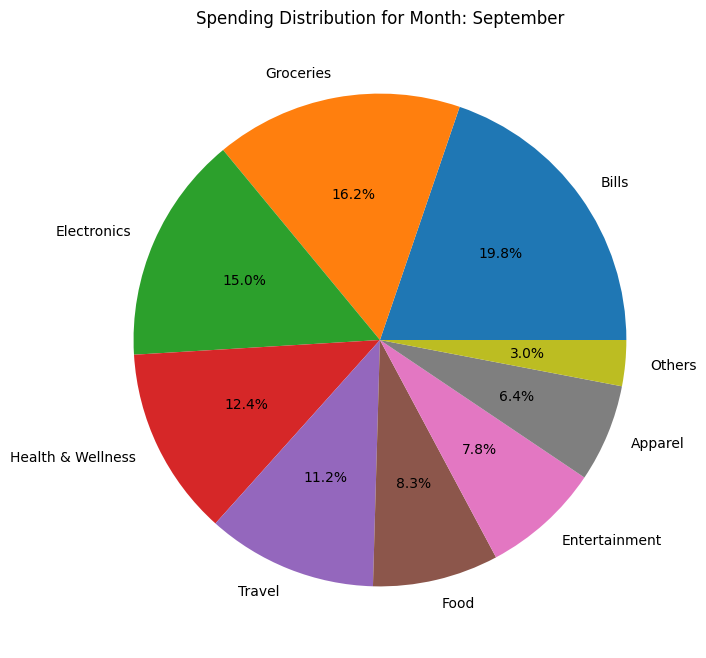

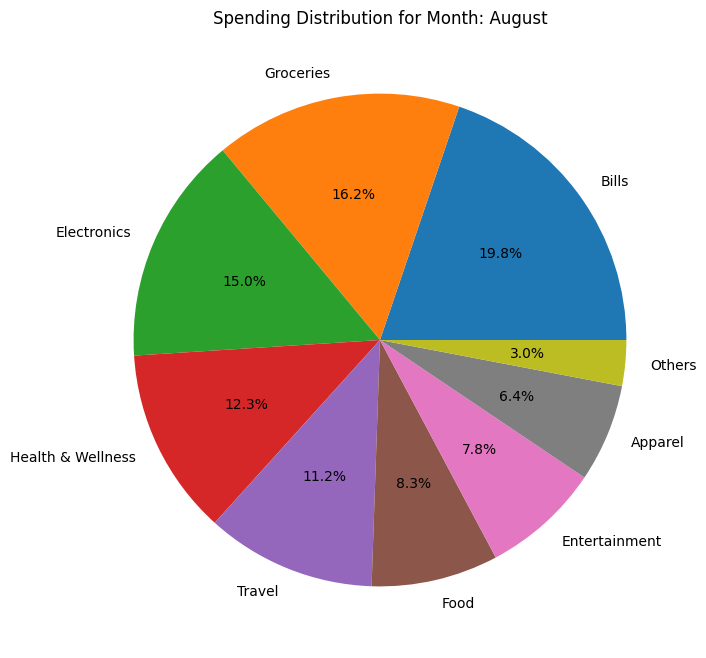

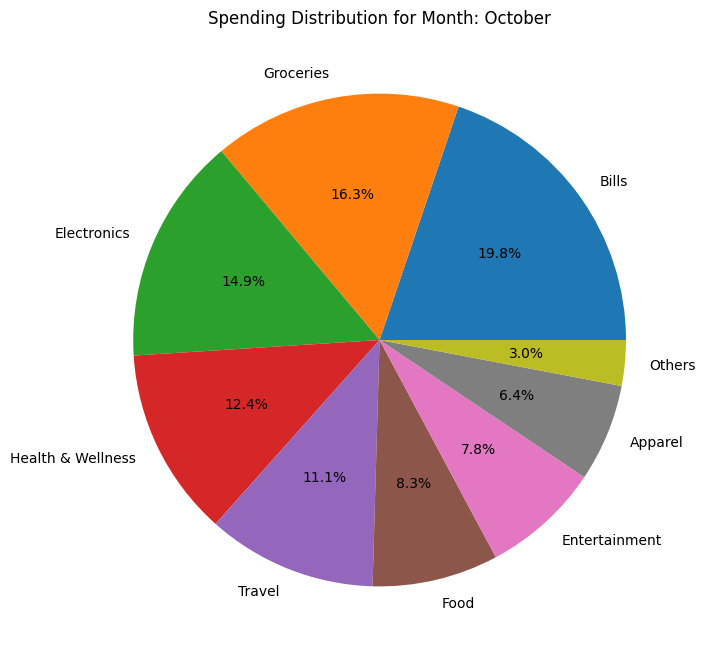

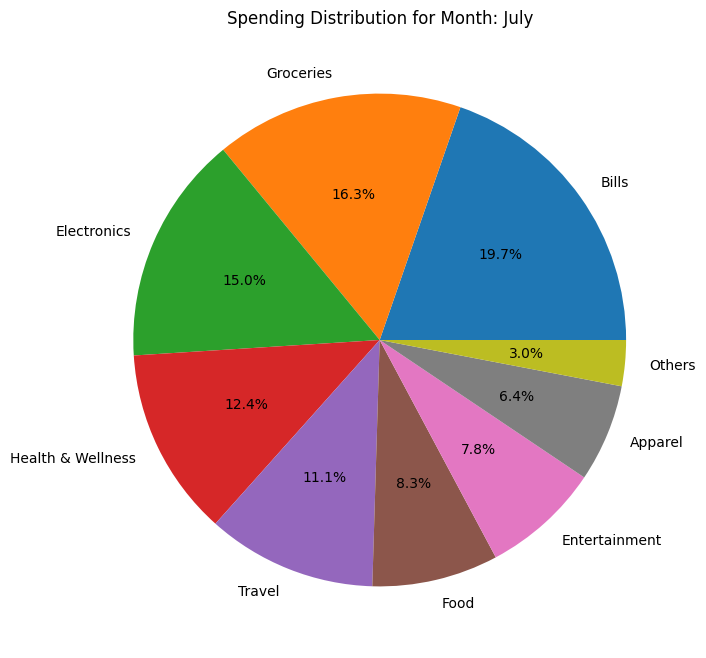

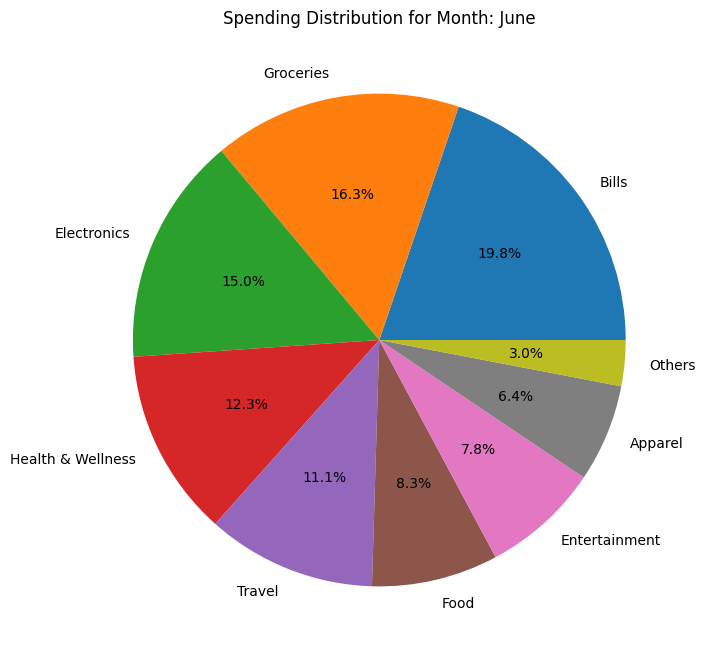

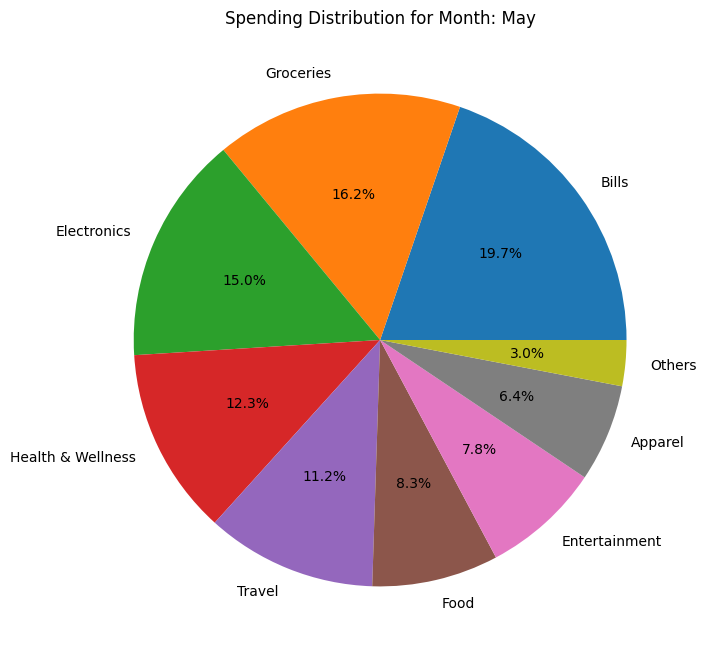

In [ ]:
import matplotlib.pyplot as plt

# Assuming spend_by_month_category is already defined, grouped by month and category
spend_by_month_category = df.groupby(['month', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique months
months = spend_by_month_category['month'].unique()

# Plot a pie chart for each month
for month in months:
    # Filter the data for the current month
    data = spend_by_month_category[spend_by_month_category['month'] == month]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for Month: {month}')
    plt.show()


In [ ]:
customer_spend_ratio['spend']=df['spend']
customer_spend_ratio['category']=df['category']

In [ ]:
customer_spend_ratio.to_csv('utilizatio.csv',index=False)

Fro above we can see that in every month trend of spending is same

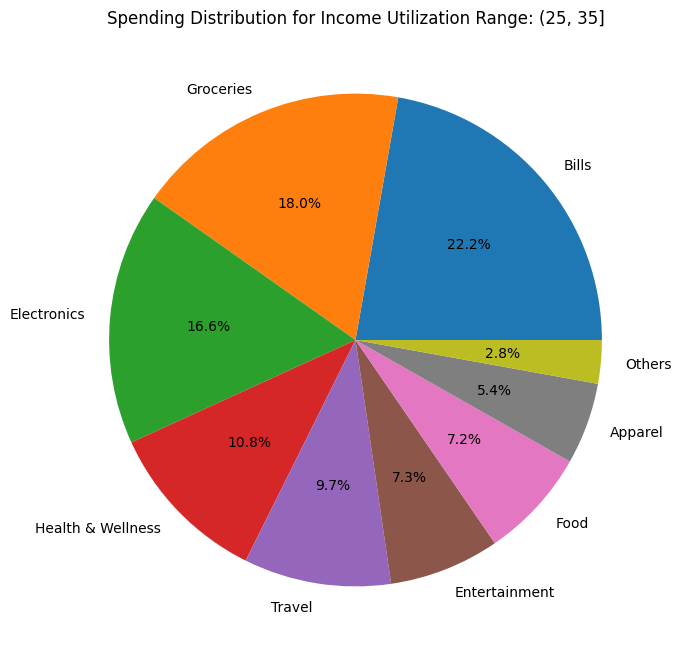

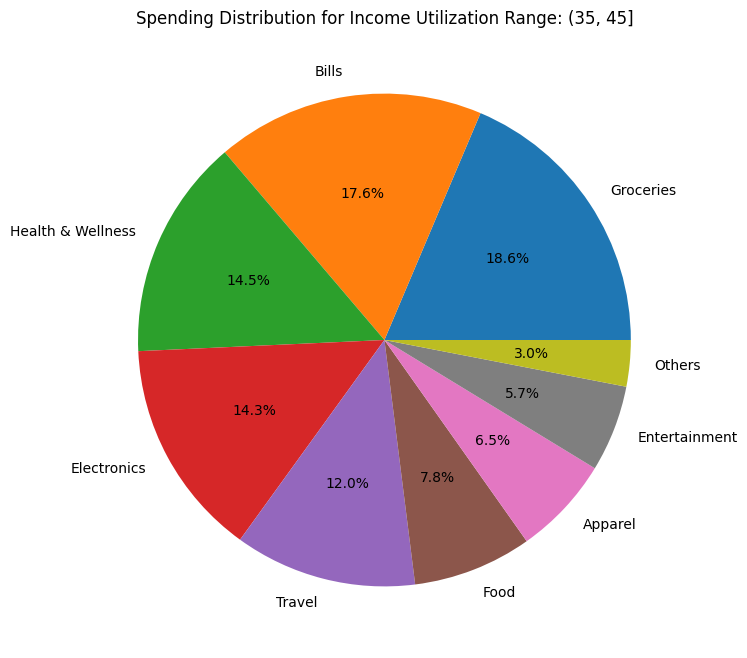

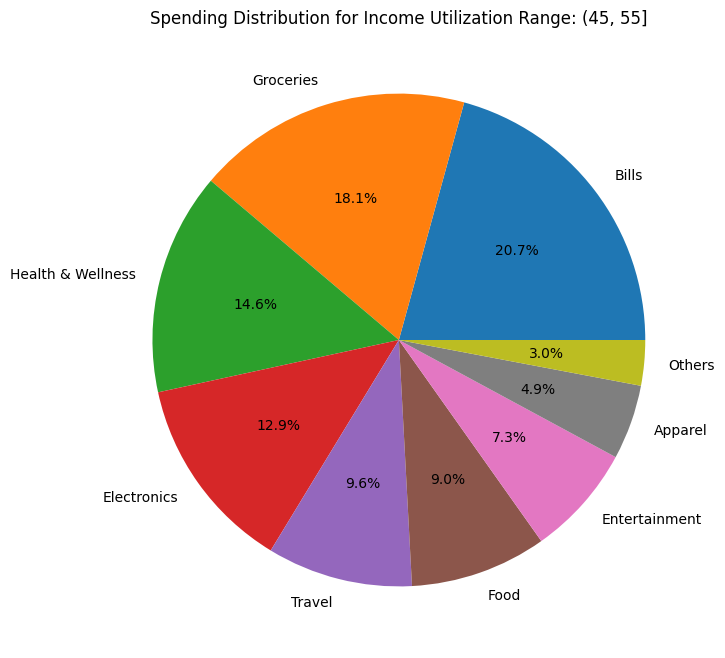

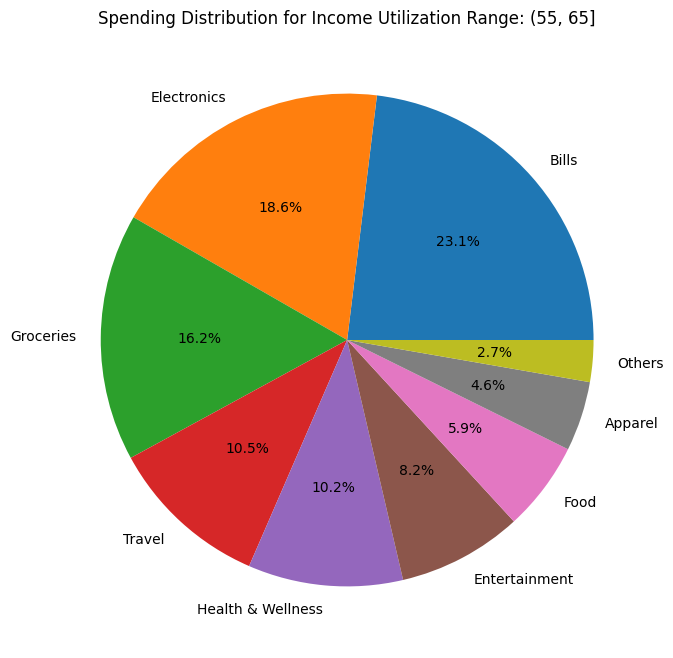

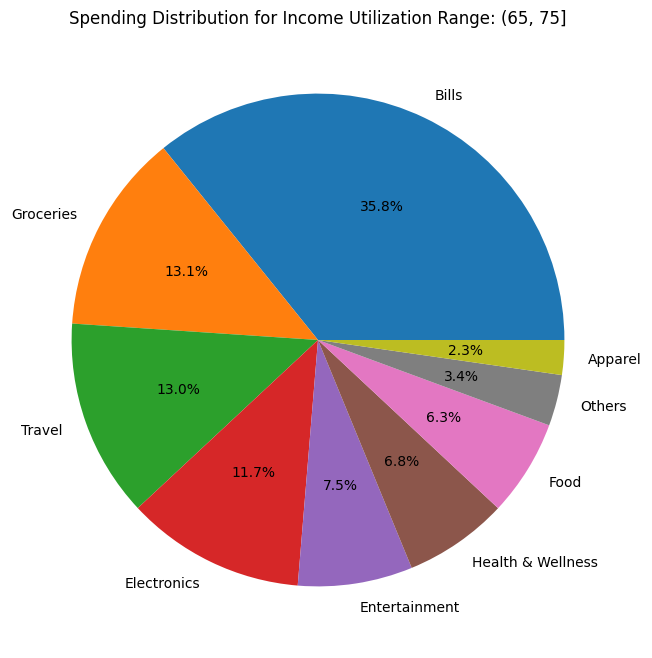

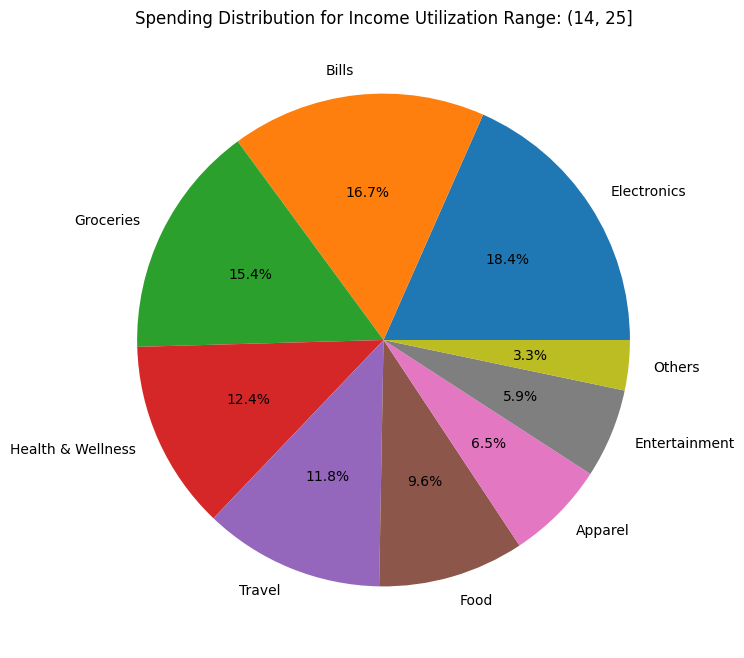

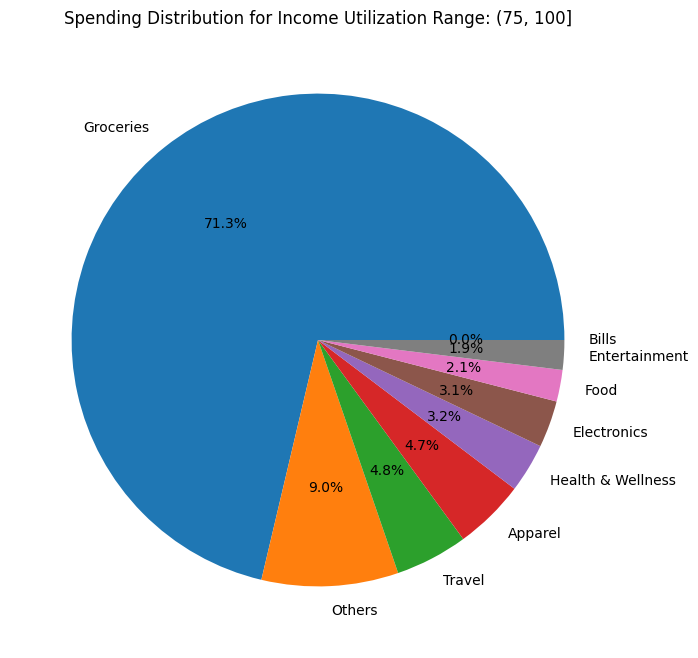

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming customer_spend_ratio is your DataFrame and it contains the 'avg_income_utilization_pct' column.

# Define the spending range bins
bins = [14, 25, 35, 45, 55, 65, 75, 100]

# Create a new column in the DataFrame to categorize the average income utilization percentages
customer_spend_ratio['spend_range'] = pd.cut(customer_spend_ratio['avg_income_utilization_pct'], bins)

# Group by the new 'spend_range' column and category, and sum the spend
spend_by_range_category = customer_spend_ratio.groupby(['spend_range', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique spending ranges
spend_ranges = spend_by_range_category['spend_range'].unique()

# Plot a pie chart for each spending range
for spend_range in spend_ranges:
    # Filter the data for the current spending range
    data = spend_by_range_category[spend_by_range_category['spend_range'] == spend_range]

    # Plot
    plt.figure(figsize=(8, 8))  # Adjust the size as needed
    plt.pie(data['spend'], labels=data['category'], autopct='%1.1f%%')
    plt.title(f'Spending Distribution for Income Utilization Range: {spend_range}')
    plt.show()


In [ ]:
import pandas as pd

# Assuming customer_spend_ratio is your DataFrame and it contains the 'avg_income_utilization_pct' column.

# Define the spending range bins
bins = [14, 25, 35, 45, 55, 65, 75, 100]

# Create a new column in the DataFrame to categorize the average income utilization percentages
customer_spend_ratio['spend_range'] = pd.cut(customer_spend_ratio['avg_income_utilization_pct'], bins)

# Group by the new 'spend_range' column and category, and sum the spend
spend_by_range_category = customer_spend_ratio.groupby(['spend_range', 'category'])['spend'].sum().reset_index().sort_values(by='spend', ascending=False)

# Get unique spending ranges
spend_ranges = spend_by_range_category['spend_range'].unique()

# Print the top three categories for each spending range
for spend_range in spend_ranges:
    # Filter the data for the current spending range
    data = spend_by_range_category[spend_by_range_category['spend_range'] == spend_range]

    # Get the top three categories for the current spending range
    top_three_categories = data.nlargest(3, 'spend')
    print(f"Top three categories for {spend_range}:")
    print(top_three_categories[['category', 'spend']], "\n")


Top three categories for (25, 35]:
       category   spend
10        Bills  123990
14    Groceries  100439
11  Electronics   92652 

Top three categories for (35, 45]:
             category   spend
23          Groceries  122118
19              Bills  115386
24  Health & Wellness   95114 

Top three categories for (45, 55]:
             category   spend
28              Bills  117114
32          Groceries  102190
33  Health & Wellness   82453 

Top three categories for (55, 65]:
       category  spend
37        Bills  79891
38  Electronics  64522
41    Groceries  56234 

Top three categories for (65, 75]:
     category  spend
46      Bills  42718
50  Groceries  15686
53     Travel  15526 

Top three categories for (14, 25]:
      category  spend
2  Electronics  26911
1        Bills  24459
5    Groceries  22496 

Top three categories for (75, 100]:
     category  spend
59  Groceries   6499
61     Others    817
62     Travel    434 



In [ ]:
df.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income_utilization_pct
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,37.818927
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,37.818927
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,37.818927
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,37.818927
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,37.818927
